En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


In [18]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import kstest
from scipy.stats import skew


import math 
from sklearn.preprocessing import MinMaxScaler


plt.rcParams["figure.figsize"] = (20,14) 

import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("datos/cars_price1.csv")
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Black,8



- En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:



- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


Manualmente:

In [5]:
media = df["Price"].mean()
maximo = df["Price"].max() 
minimo = df["Price"].min()

In [6]:
df["Price_norm"] = (df["Price"] - media) / (maximo - minimo )

In [7]:
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Silver,12,-0.020222
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Black,8,-0.009545


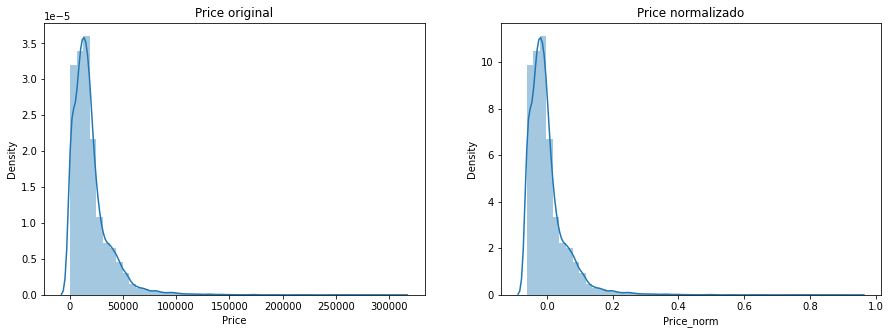

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_norm"], ax = axes[1]);

In [16]:
kstest(df['Price_norm'], 'norm')

KstestResult(statistic=0.47535638501717203, pvalue=0.0)

Logarítmica

In [11]:
df["Price_log"] = df["Price"].apply(lambda x: np.log(x) if x > 0 else 0)

In [12]:
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Silver,12,-0.020222,9.497622
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Black,8,-0.009545,9.718422


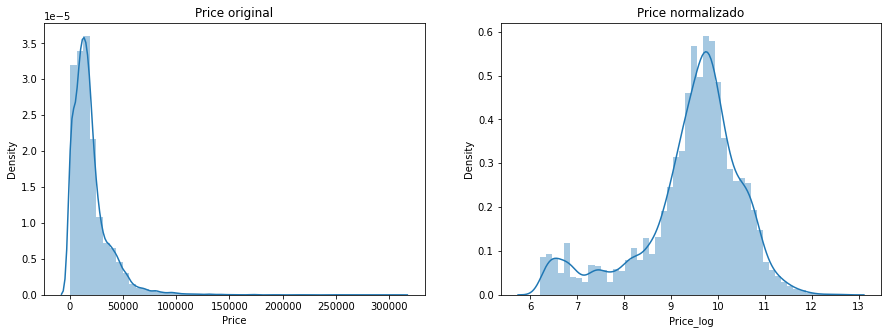

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_log"], ax = axes[1]);

In [15]:
kstest(df['Price_log'], 'norm')

KstestResult(statistic=0.9999999997427355, pvalue=0.0)

Raíz cuadrada

In [19]:
df["Price_raiz"] = df["Price"].apply(lambda x: math.sqrt(x))

In [20]:
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Silver,12,-0.020222,9.497622,115.446958
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Black,8,-0.009545,9.718422,128.922457


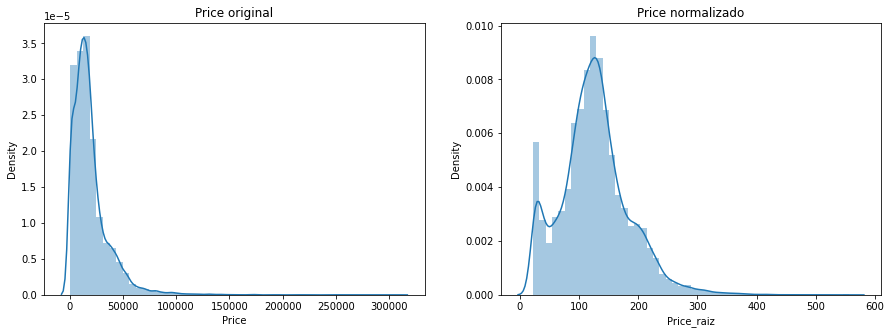

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_raiz"], ax = axes[1]);

In [22]:
kstest(df['Price_raiz'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Stats.boxcox()

In [23]:
df['Price_box'], lambda_ajustada = stats.boxcox(df['Price'])

In [24]:
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz,Price_box
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,6.0,Automatic,4x4,4,Silver,12,-0.020222,9.497622,115.446958,54.658977
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,...,6.0,Tiptronic,4x4,4,Black,8,-0.009545,9.718422,128.922457,58.644792


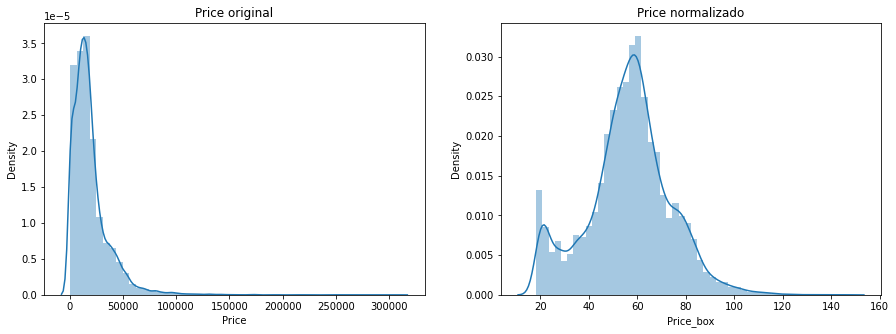

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_box"], ax = axes[1]);

In [26]:
kstest(df['Price_box'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Sklearn MinMaxScaller

In [27]:
numericas = df.select_dtypes(include = np.number)

In [28]:
minmax = MinMaxScaler()

In [29]:
minmax.fit(df[['Price']])

MinMaxScaler()

In [30]:
X_normalizadas = minmax.transform(df[["Price"]])

In [31]:
X_normalizadas.min(axis=0)

array([0.])

In [32]:
X_normalizadas.max(axis=0)

array([1.])

In [33]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["Price_Sklearn"])
numericas_minmax.head(2)

,Price_Sklearn
0,0.041595
1,0.052272


In [34]:
df["Price_Sklearn"] = numericas_minmax
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz,Price_box,Price_Sklearn
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,Automatic,4x4,4,Silver,12,-0.020222,9.497622,115.446958,54.658977,0.041595
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,...,Tiptronic,4x4,4,Black,8,-0.009545,9.718422,128.922457,58.644792,0.052272


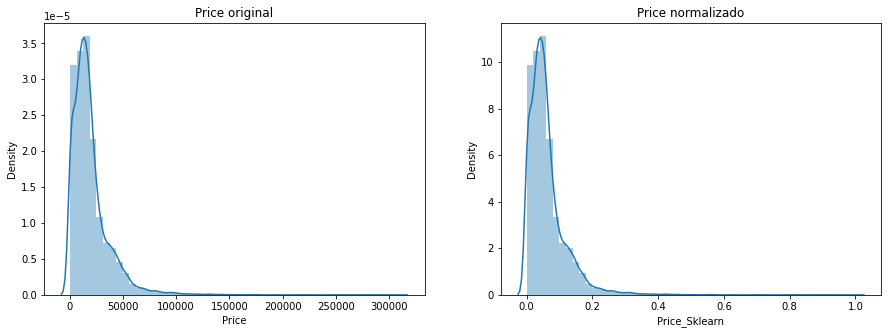

In [35]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df['Price_Sklearn'], ax = axes[1]);

In [36]:
kstest(df['Price_Sklearn'], 'norm')

KstestResult(statistic=0.5000021587981512, pvalue=0.0)

dropeamos las no relevantes

In [ ]:
#prendiente:
df.drop([''], axis = 1, inplace = True)

Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings